<a href="https://colab.research.google.com/github/Amelaouadni/Data-Visualization-project/blob/master/data_viz_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import *
import pytz

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data1 = pd.read_csv('/content/sample_data/matched_sales.tsv',sep='\t')
data1.head()

,Timestamp,Environment,Os,Device,Campaign ID,User ID,Context ID,Transaction ID,Order Value
0,1569889040,web,Windows,Desktop,113450,2EEEE2185BB347E07653128DDD7946B4,6.0,687260E81F123BF7B22EB42E2CC740D9,32.08
1,1569890180,web,Android,Smartphone,137914,18F4B9C704A39843FE4354E1E2091942,8.0,4CA9C121F6F94CD135F4A6F4934D4843,149.92
2,1569890704,web,Windows,Desktop,137914,513CD8C04005C7ED66F34CD98C63C455,9.0,F44BB650A3149704B9F86EF8796E6604,125.10
3,1569892066,web,Android,Smartphone,137914,1620E50E507DDF33489D80D7423111DF,7.0,5E022540529ECBCB947C04D969260287,95.95
4,1569892673,web,Windows,Desktop,137914,85AC7958028EFF2231B4962D3611D2D3,6.0,8428EF0717350A6C843B91957A30464B,83.54


In [0]:
data1.shape

(264716, 9)

In [0]:
data1.columns

Index(['Timestamp', 'Environment', 'Os', 'Device', 'Campaign ID', 'User ID',
       'Context ID', 'Transaction ID', 'Order Value'],
      dtype='object')

In [0]:
data1.tail

<bound method NDFrame.tail of          Timestamp Environment  ...                    Transaction ID Order Value
0       1569889040         web  ...  687260E81F123BF7B22EB42E2CC740D9       32.08
1       1569890180         web  ...  4CA9C121F6F94CD135F4A6F4934D4843      149.92
2       1569890704         web  ...  F44BB650A3149704B9F86EF8796E6604      125.10
3       1569892066         web  ...  5E022540529ECBCB947C04D969260287       95.95
4       1569892673         web  ...  8428EF0717350A6C843B91957A30464B       83.54
...            ...         ...  ...                               ...         ...
264711  1577554665         web  ...  D82133954D04AE866406B9ED92165BB6       24.99
264712  1577554680         web  ...  BDDE4FFBB15D5011C6A10250ED2F7C76       66.37
264713  1577554723         app  ...  762A2397366F01B93B9E561BE395B7E2       20.83
264714  1577554751         web  ...  D429A2AD7C43C4A891A5F4077C486A55       70.82
264715  1577554812         web  ...                               Na

In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264716 entries, 0 to 264715
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Timestamp       264716 non-null  int64  
 1   Environment     264716 non-null  object 
 2   Os              264716 non-null  object 
 3   Device          264716 non-null  object 
 4   Campaign ID     264716 non-null  int64  
 5   User ID         264715 non-null  object 
 6   Context ID      264715 non-null  float64
 7   Transaction ID  264691 non-null  object 
 8   Order Value     264715 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 18.2+ MB


**Question 1.1:**


In [0]:
data1 = data1.drop_duplicates(subset='Transaction ID', keep="first")

In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264241 entries, 0 to 264714
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Timestamp       264241 non-null  int64  
 1   Environment     264241 non-null  object 
 2   Os              264241 non-null  object 
 3   Device          264241 non-null  object 
 4   Campaign ID     264241 non-null  int64  
 5   User ID         264241 non-null  object 
 6   Context ID      264241 non-null  float64
 7   Transaction ID  264240 non-null  object 
 8   Order Value     264241 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.2+ MB


In [0]:
data1.drop(data1[data1['Order Value']==0].index, inplace=True)

In [0]:
data1.sort_values(by='Order Value')

,Timestamp,Environment,Os,Device,Campaign ID,User ID,Context ID,Transaction ID,Order Value
261161,1577314653,web,iOS,Smartphone,196251,3338587D16D2776528175C72A8782030,6.0,A7E24D6408BC196CFA2252FDCF9D4128,0.01
261149,1577314102,web,Android,Smartphone,137914,742A4C0EB0F59CEBC2DBFFD71B79FC11,0.0,FF9029091E60EC4DAAC3C9CBE60CE9F2,0.01
260640,1577278903,web,Mac OS,Desktop,137914,EC243E7A95C4B0A7C83B57E1A6CB4AD7,8.0,A28D5F8BAD78EE5428F6BB1B54DD886E,0.01
261220,1577337886,web,Android,Smartphone,113450,B11F8FD9A1878F25283E767A973FBC5C,6.0,CF03B1D1B5B55D834DFBE185B618390E,0.01
261107,1577311325,web,Windows,Desktop,113450,60B1642D08AC9F5D5B59A53573F893B1,4.0,5B7392063D1A6C5777FA82D73DB038E9,0.01
...,...,...,...,...,...,...,...,...,...
148190,1574619257,web,Mac OS,Desktop,137914,666634216F543283FEE21911D0C25002,7.0,5BBB88A4F37679AB04FB0D5540CDAE2C,4733.71
29779,1570983589,app,iOS,Unknown,137914,577E1BF16D4539E42764DBB881D7CE8D,7.0,A5CCD16F827A083C52ED3E1356B51D32,5137.00
20,1569899805,web,Mac OS,Desktop,137914,2F258EC63C056C4ADF6B9E82A08D90EC,7.0,5E9F234F56E6028C0ED0F66EF108A5DF,5141.04
232656,1576165124,app,iOS,Unknown,196251,333D3F038FB5D1E7741343D22CA1C54E,6.0,D85660E56ADDA8FD6C8506418357D4B4,5932.15


In [0]:
data1.drop(data1[data1['Order Value']==51658.00].index, inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262584 entries, 0 to 264714
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Timestamp       262584 non-null  int64  
 1   Environment     262584 non-null  object 
 2   Os              262584 non-null  object 
 3   Device          262584 non-null  object 
 4   Campaign ID     262584 non-null  int64  
 5   User ID         262584 non-null  object 
 6   Context ID      262584 non-null  float64
 7   Transaction ID  262584 non-null  object 
 8   Order Value     262584 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.0+ MB


In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262584 entries, 0 to 264714
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Timestamp       262584 non-null  int64  
 1   Environment     262584 non-null  object 
 2   Os              262584 non-null  object 
 3   Device          262584 non-null  object 
 4   Campaign ID     262584 non-null  int64  
 5   User ID         262584 non-null  object 
 6   Context ID      262584 non-null  float64
 7   Transaction ID  262584 non-null  object 
 8   Order Value     262584 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.0+ MB


**Question 1.2:**

In [0]:
for tz in pytz.all_timezones:
        print(tz)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad

**Question 1.3**

In [0]:

from datetime import datetime

date= pd.to_datetime(data1['Timestamp'], unit='s',errors='coerce')
date

0        2019-10-01 00:17:20
1        2019-10-01 00:36:20
2        2019-10-01 00:45:04
3        2019-10-01 01:07:46
4        2019-10-01 01:17:53
                 ...        
264710   2019-12-28 17:37:20
264711   2019-12-28 17:37:45
264712   2019-12-28 17:38:00
264713   2019-12-28 17:38:43
264714   2019-12-28 17:39:11
Name: Timestamp, Length: 262584, dtype: datetime64[ns]

In [0]:
data1.dropna(subset=['Order Value'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262584 entries, 0 to 264714
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Timestamp       262584 non-null  int64  
 1   Environment     262584 non-null  object 
 2   Os              262584 non-null  object 
 3   Device          262584 non-null  object 
 4   Campaign ID     262584 non-null  int64  
 5   User ID         262584 non-null  object 
 6   Context ID      262584 non-null  float64
 7   Transaction ID  262584 non-null  object 
 8   Order Value     262584 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.0+ MB


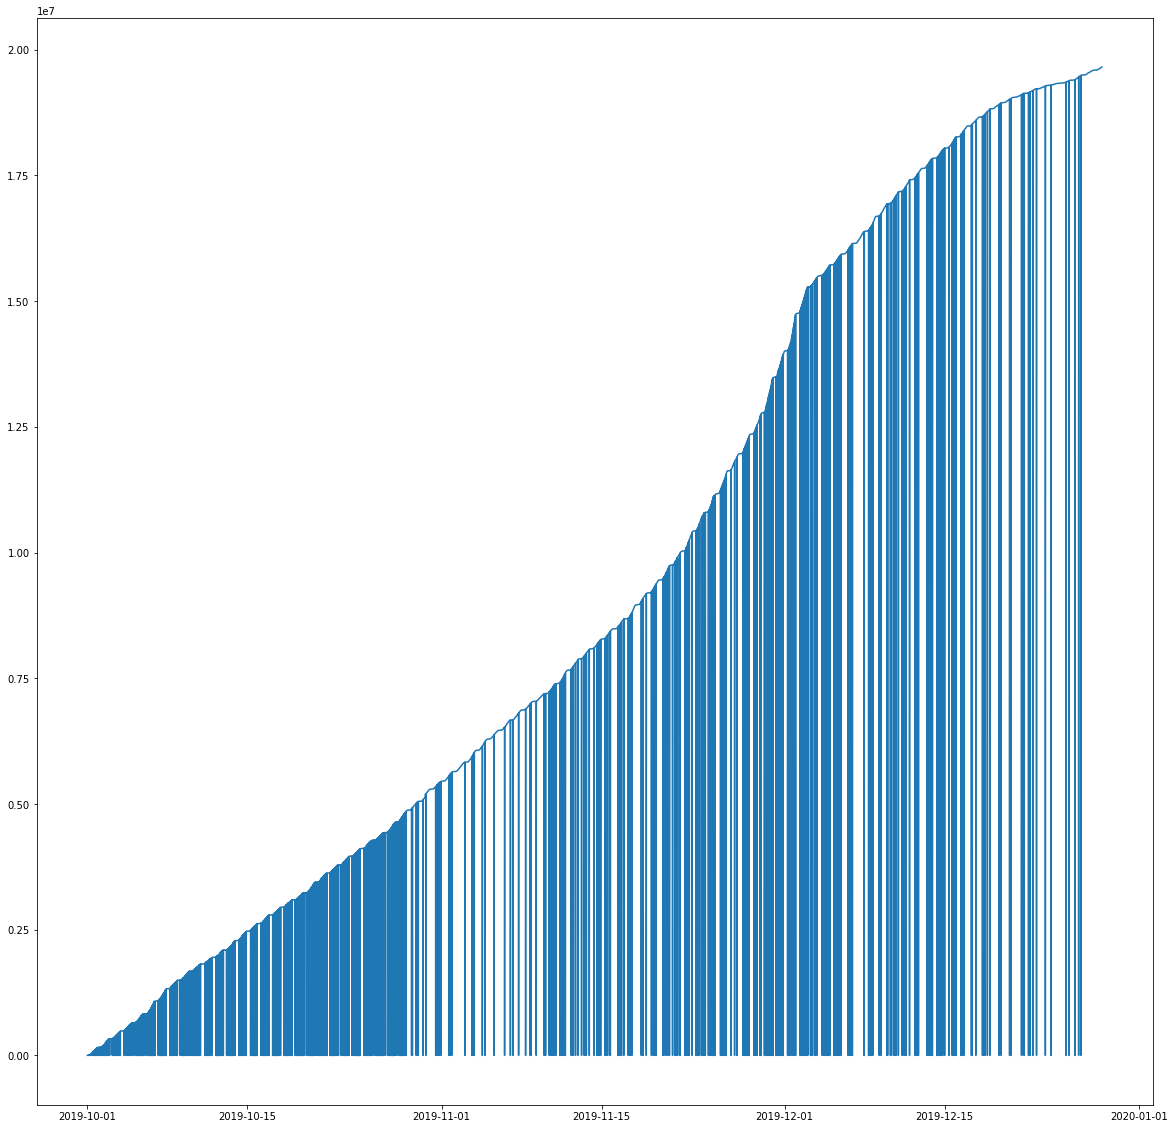

In [0]:
d1=data1.get("Order Value")
s=0
X=[]
for i in range(len(d1)):
    try:
      s=s+d1[i]
      X.append(s)
    except KeyError :
      X.append(0)
fig = plt.figure(figsize=(20,20))  
plt.plot(date,X)
plt.show() 

Question 1.4:

In [0]:
data1.isnull()

,Timestamp,Environment,Os,Device,Campaign ID,User ID,Context ID,Transaction ID,Order Value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
264710,False,False,False,False,False,False,False,False,False
264711,False,False,False,False,False,False,False,False,False
264712,False,False,False,False,False,False,False,False,False
264713,False,False,False,False,False,False,False,False,False


<Figure size 1152x1152 with 0 Axes>

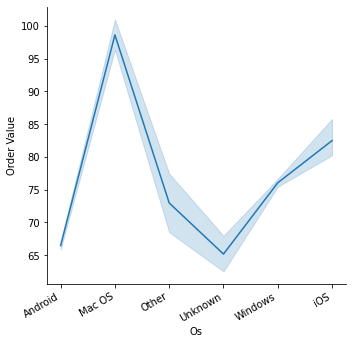

In [0]:
plt.figure(figsize=(16,16))
g = sns.relplot(x="Os", y="Order Value", kind="line", data=data1)
g.fig.autofmt_xdate()

**Question2 :**

In [0]:
data2 = pd.read_csv("/content/sample_data/campaigns_delivery.tsv", sep='\t')
data2.head()

,Day,Environment,Os,Campaign ID,Campaign Optimization,Campaign Type,Context IDs Eligible,Number of displays,Number of clicks,Criteo Revenue,Criteo Cost
0,2019-10-13,app,Android,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",11487,199,1.223468,0.635936
1,2019-10-16,web,Windows,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",0,0,0.000000,0.000000
2,2019-11-08,app,Android,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",0,0,0.000000,0.000000
3,2019-10-11,web,Mac OS,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",2102,21,1.392722,0.842206
4,2019-10-16,app,Android,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",0,0,0.000000,0.000000


In [0]:
data2.columns

Index(['Day', 'Environment', 'Os', 'Campaign ID', 'Campaign Optimization',
       'Campaign Type', 'Context IDs Eligible', 'Number of displays',
       'Number of clicks', 'Criteo Revenue', 'Criteo Cost'],
      dtype='object')

In [0]:
data2.shape

(8828, 11)

**Question 2.1:**

In [0]:
d1= data2["Criteo Cost"]
d2=data2["Criteo Revenue"]
mr = d2 - d1 
avg = sum(mr)/len(mr)
print("The average Criteo margin  is ", round(avg,2))

The average Criteo margin  is  130.52


**Question 2.2:**

In [0]:
data2.sort_values(by='Day')

,Day,Environment,Os,Campaign ID,Campaign Optimization,Campaign Type,Context IDs Eligible,Number of displays,Number of clicks,Criteo Revenue,Criteo Cost
4047,2019-10-07,web,iOS,113890,Conversion Optimization,LOWER FUNNEL CUSTOM,"0-6,10",17630,121,17.033786,9.788570
6460,2019-10-07,web,Windows,137914,Conversion Optimization,LOWER FUNNEL CUSTOM,0-10,3959303,16010,7905.957985,4792.584782
8341,2019-10-07,web,Mac OS,179971,Visit Optimization,PROSPECTING,"0-6,10",6603,10,1.289095,0.884069
6312,2019-10-07,web,iOS,137914,Conversion Optimization,LOWER FUNNEL CUSTOM,0-10,478448,2049,681.591556,405.756166
669,2019-10-07,app,iOS,182460,Visit Optimization,INAPP,2-10,139854,655,72.308770,39.745127
...,...,...,...,...,...,...,...,...,...,...,...
4259,2020-01-30,web,Unknown,113890,Conversion Optimization,LOWER FUNNEL CUSTOM,"0-6,10",6398,54,14.710000,3.235318
3773,2020-01-30,web,Other,113890,Conversion Optimization,LOWER FUNNEL CUSTOM,"0-6,10",30880,12,3.240000,39.437964
1224,2020-01-30,web,Mac OS,203945,Conversion Optimization,LOWER FUNNEL CUSTOM,0-10,602,5,0.750000,0.335551
6948,2020-01-30,other,Mac OS,137914,Conversion Optimization,LOWER FUNNEL CUSTOM,0-10,186,0,0.058473,0.029037


In [0]:
data2['margin'] = data2['Criteo Revenue']-data2['Criteo Cost']
data2.head()

,Day,Environment,Os,Campaign ID,Campaign Optimization,Campaign Type,Context IDs Eligible,Number of displays,Number of clicks,Criteo Revenue,Criteo Cost,margin
0,2019-10-13,app,Android,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",11487,199,1.223468,0.635936,0.587531
1,2019-10-16,web,Windows,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",0,0,0.000000,0.000000,0.000000
2,2019-11-08,app,Android,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",0,0,0.000000,0.000000,0.000000
3,2019-10-11,web,Mac OS,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",2102,21,1.392722,0.842206,0.550516
4,2019-10-16,app,Android,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",0,0,0.000000,0.000000,0.000000


In [0]:
dr = data2.groupby(['margin']).mean()

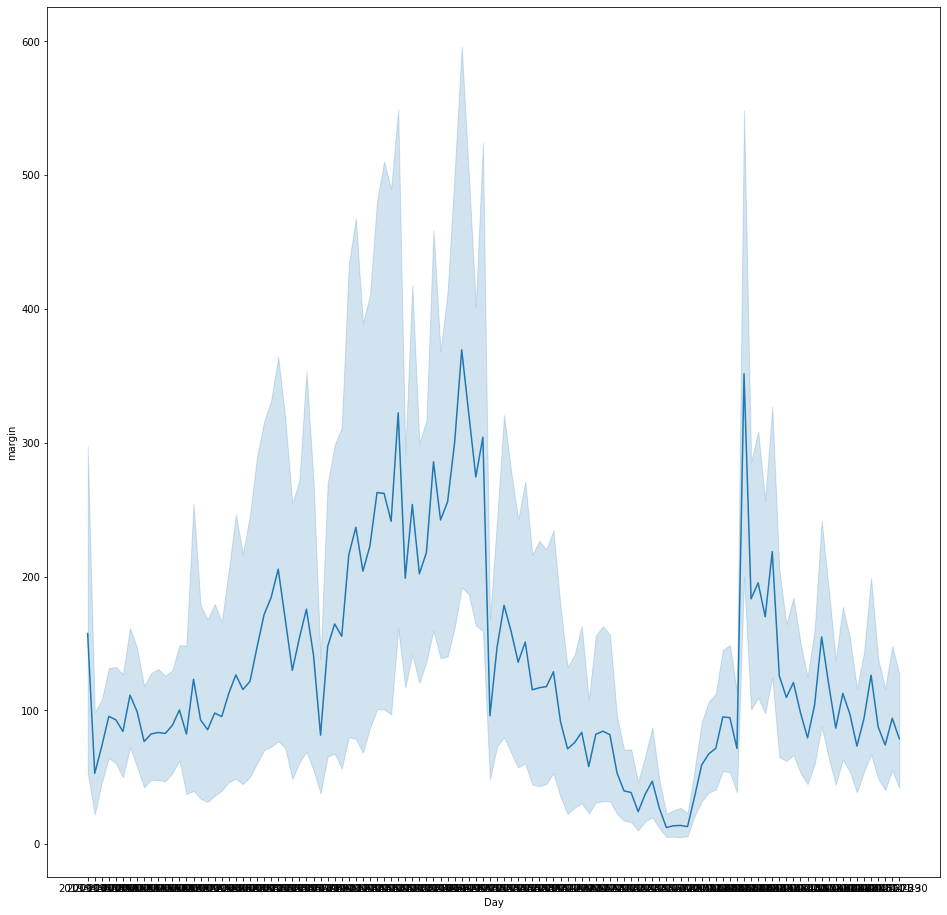

In [0]:
plt.figure(figsize=(16,16))
sns.lineplot(x="Day", y="margin",data= data2)

In [0]:
data2['weekday'] = pd.to_datetime(data2['Day']).apply(lambda x: x.weekday())
weekday= data2['weekday']
data2.head()

,Day,Environment,Os,Campaign ID,Campaign Optimization,Campaign Type,Context IDs Eligible,Number of displays,Number of clicks,Criteo Revenue,Criteo Cost,margin,weekday
0,2019-10-13,app,Android,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",11487,199,1.223468,0.635936,0.587531,6
1,2019-10-16,web,Windows,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",0,0,0.000000,0.000000,0.000000,2
2,2019-11-08,app,Android,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",0,0,0.000000,0.000000,0.000000,4
3,2019-10-11,web,Mac OS,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",2102,21,1.392722,0.842206,0.550516,4
4,2019-10-16,app,Android,194439,Visit Optimization,MID FUNNEL CUSTOM,"0-6,10",0,0,0.000000,0.000000,0.000000,2


NameError: ignored

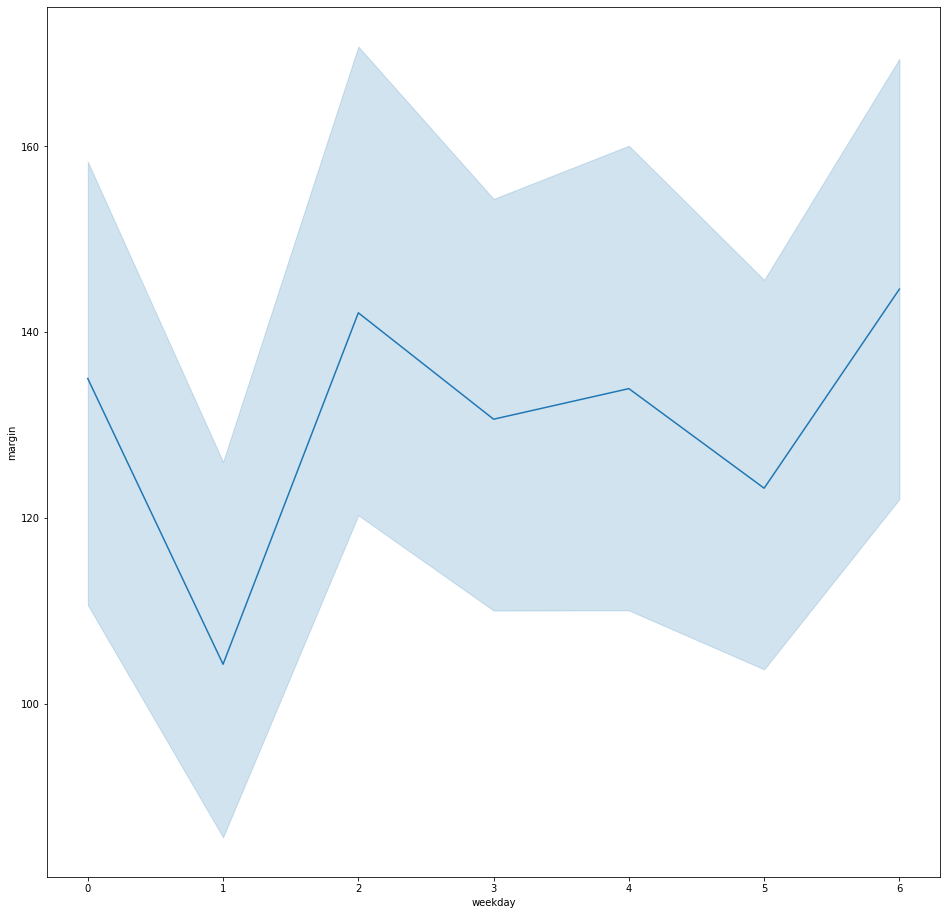

In [0]:
plt.figure(figsize=(16,16))
sns.lineplot(x="weekday", y="margin",data= data2)

ax.set_title('the margin over week') 


plt.show()

**Question 2.3:**

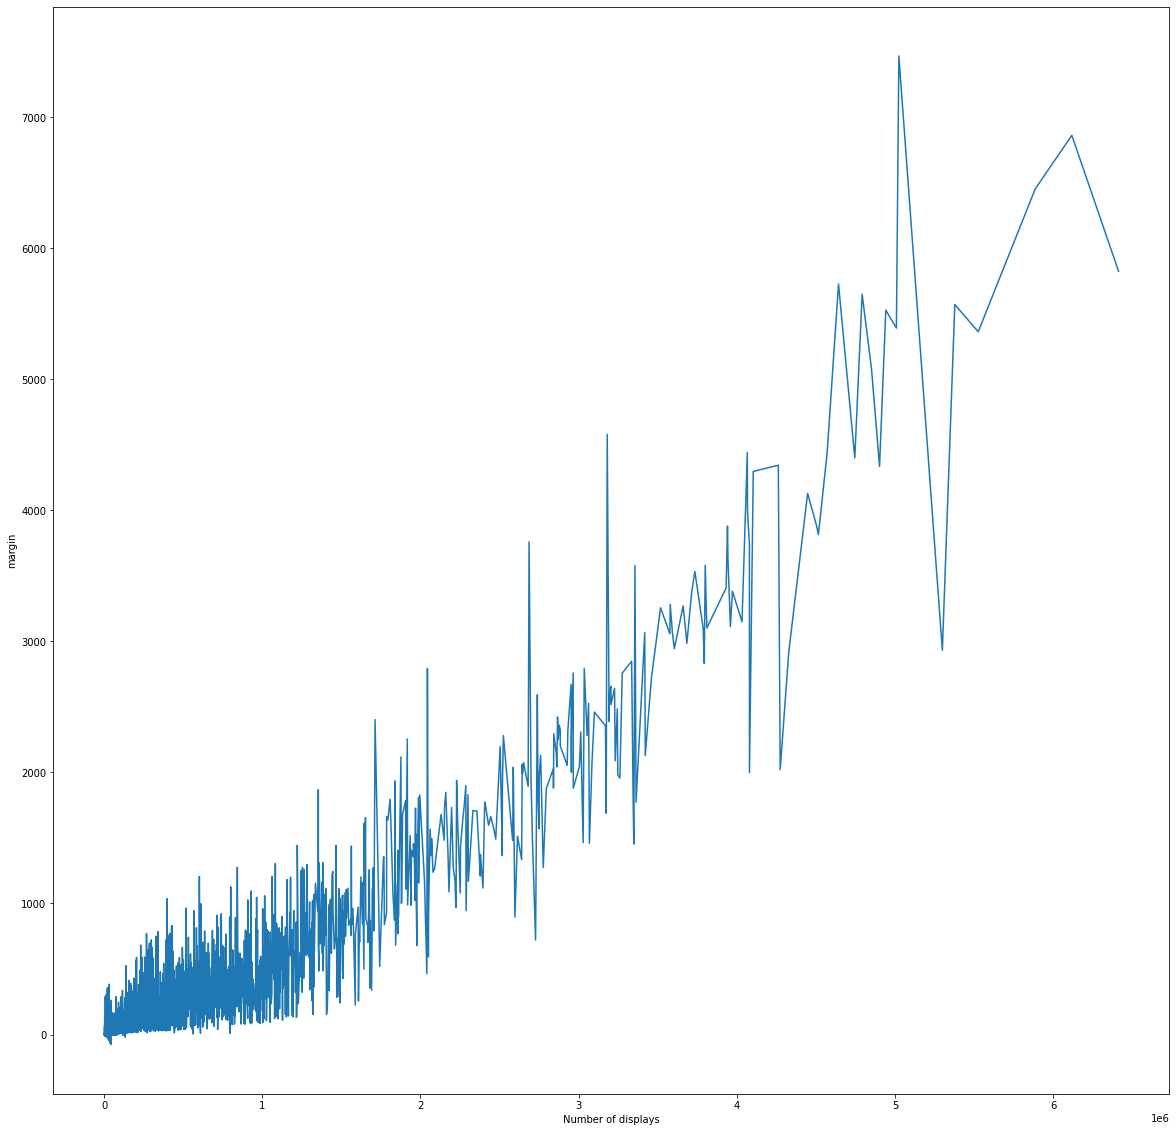

In [0]:
fig = plt.figure(figsize=(20,20))

sns.lineplot(x="Number of displays", y="margin",data= data2)


**Question 3:**

In [0]:
Merge = pd.merge(data1,data2)
Merge.head()

,Timestamp,Environment,Os,Device,Campaign ID,User ID,Context ID,Transaction ID,Order Value,Day,Campaign Optimization,Campaign Type,Context IDs Eligible,Number of displays,Number of clicks,Criteo Revenue,Criteo Cost,margin
0,1569889040,web,Windows,Desktop,113450,2EEEE2185BB347E07653128DDD7946B4,6.0,687260E81F123BF7B22EB42E2CC740D9,32.08,2019-11-17,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",1606181,8793,2293.247236,1320.873010,972.374226
1,1569889040,web,Windows,Desktop,113450,2EEEE2185BB347E07653128DDD7946B4,6.0,687260E81F123BF7B22EB42E2CC740D9,32.08,2020-01-23,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",1329158,3979,1441.775243,812.069900,629.705343
2,1569889040,web,Windows,Desktop,113450,2EEEE2185BB347E07653128DDD7946B4,6.0,687260E81F123BF7B22EB42E2CC740D9,32.08,2019-12-22,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",327223,2078,325.487455,188.981562,136.505892
3,1569889040,web,Windows,Desktop,113450,2EEEE2185BB347E07653128DDD7946B4,6.0,687260E81F123BF7B22EB42E2CC740D9,32.08,2019-12-26,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",461660,2766,485.802541,285.085894,200.716647
4,1569889040,web,Windows,Desktop,113450,2EEEE2185BB347E07653128DDD7946B4,6.0,687260E81F123BF7B22EB42E2CC740D9,32.08,2020-01-28,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",1437866,4562,1404.454606,784.938012,619.516594


**Question4:**

  ** Question 4.1:**

In [0]:
Merge.sort_values(by='Campaign ID')

,Timestamp,Environment,Os,Device,Campaign ID,User ID,Context ID,Transaction ID,Order Value,Day,Campaign Optimization,Campaign Type,Context IDs Eligible,Number of displays,Number of clicks,Criteo Revenue,Criteo Cost,margin,weekday
0,1569889040,web,Windows,Desktop,113450,2EEEE2185BB347E07653128DDD7946B4,6.0,687260E81F123BF7B22EB42E2CC740D9,32.08,2019-11-17,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",1606181,8793,2293.247236,1320.873010,972.374226,6
24883039,1574376978,web,Android,Smartphone,113450,CC4A5445F1F0B740E764740955E05649,6.0,9172B87A8AF59D15E3D7AED4880E277B,77.45,2020-01-09,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",393388,2726,428.950720,230.342501,198.608219,3
24883040,1574376978,web,Android,Smartphone,113450,CC4A5445F1F0B740E764740955E05649,6.0,9172B87A8AF59D15E3D7AED4880E277B,77.45,2019-12-19,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",357496,3061,314.079937,168.034400,146.045537,3
24883041,1574376978,web,Android,Smartphone,113450,CC4A5445F1F0B740E764740955E05649,6.0,9172B87A8AF59D15E3D7AED4880E277B,77.45,2020-01-27,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",388774,2573,297.294435,153.487513,143.806921,0
24883042,1574376978,web,Android,Smartphone,113450,CC4A5445F1F0B740E764740955E05649,6.0,9172B87A8AF59D15E3D7AED4880E277B,77.45,2020-01-02,Conversion Optimization,LOWER FUNNEL CUSTOM,"2-6,10",452156,3064,324.148231,170.996871,153.151360,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29046132,1577512426,web,Windows,Desktop,203946,304D3D6C03297D8ECAB118BC8DB606D3,9.0,193F0990A065897D2AE8A518699D80C0,69.99,2020-01-30,Conversion Optimization,LOWER FUNNEL CUSTOM,0-10,7338,52,7.280000,5.256058,2.023942,3
29046131,1577512426,web,Windows,Desktop,203946,304D3D6C03297D8ECAB118BC8DB606D3,9.0,193F0990A065897D2AE8A518699D80C0,69.99,2020-01-08,Conversion Optimization,LOWER FUNNEL CUSTOM,0-10,1,0,0.000245,0.000108,0.000137,2
29046130,1577512426,web,Windows,Desktop,203946,304D3D6C03297D8ECAB118BC8DB606D3,9.0,193F0990A065897D2AE8A518699D80C0,69.99,2020-01-28,Conversion Optimization,LOWER FUNNEL CUSTOM,0-10,8976,89,12.460000,7.053036,5.406964,1
29046128,1577512426,web,Windows,Desktop,203946,304D3D6C03297D8ECAB118BC8DB606D3,9.0,193F0990A065897D2AE8A518699D80C0,69.99,2020-01-19,Conversion Optimization,LOWER FUNNEL CUSTOM,0-10,8133,43,6.080000,6.245358,-0.165358,6


In [0]:
dt = Merge[['Campaign ID', 'Order Value', 'margin']]
dt = dt.groupby('Campaign ID').agg({'margin': 'mean', 'Order Value':'max'})
dt


,margin,Order Value
Campaign ID,,
113450,461.660653,4100.03
113890,87.054070,2878.88
137914,1633.684883,51658.00
179971,108.256249,2290.00
181694,12.308345,365.63
181696,9.223633,203.33
182459,26.707354,2000.42
182460,24.815333,1088.89
194439,11.652944,652.16


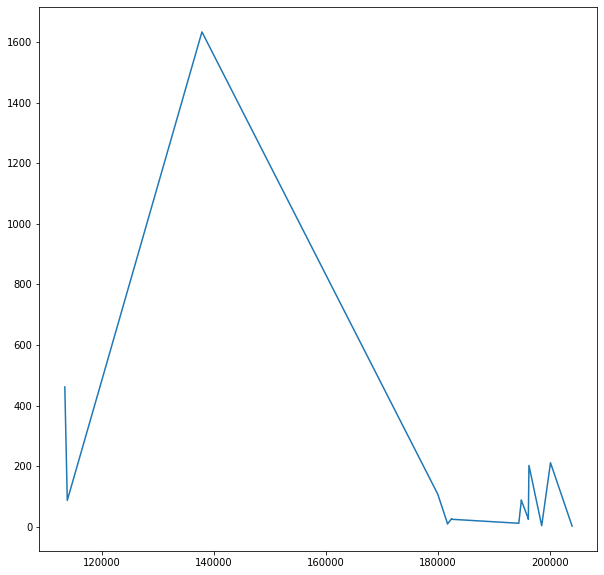

In [0]:
fig = plt.figure(figsize=(10,10))
plt.plot(dt.index,dt['margin'])
plt.show()

**  Question 4.2:**

ValueError: ignored

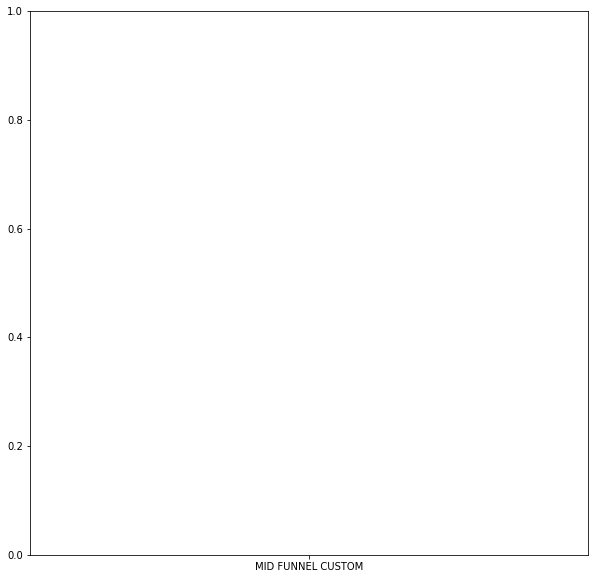

In [0]:
s1 = dt['margin']
s2 = data2['Campaign Type']
fig = plt.figure(figsize=(10,10))
plt.plot(s2,s1)
plt.show()

 ** Question 4.3:**

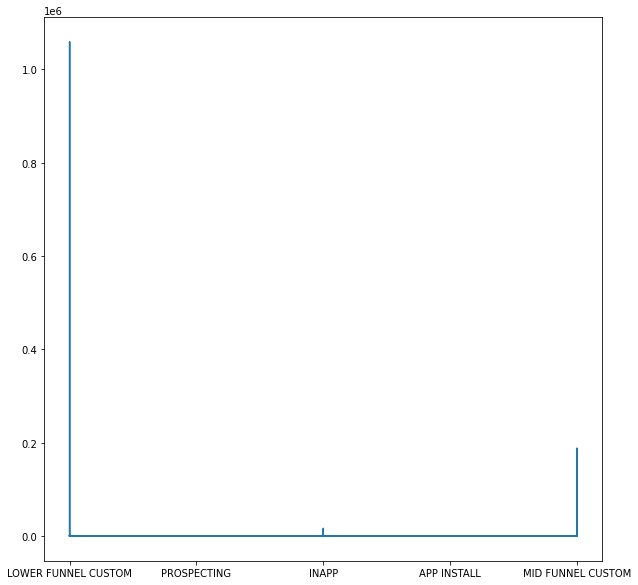

In [0]:
m1=Merge["Order Value"]
m2=Merge["Criteo Cost"]
m3=Merge["Campaign Type"]
m=m2/m1
fig = plt.figure(figsize=(10,10))
plt.plot(m3,m)
plt.show()